In [57]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("homeprices_banglore.csv")

In [73]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
sx.fit_transform(df.drop('price', axis='columns'))
sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [10]:
sdf = preprocessing.MinMaxScaler()
scaled_df = sdf.fit_transform(df)

In [13]:
scaled_df

array([[0.08827586, 0.25      , 0.05237037],
       [0.62068966, 0.75      , 0.65185185],
       [0.22068966, 0.5       , 0.22222222],
       [0.24862069, 0.5       , 0.31851852],
       [0.13793103, 0.25      , 0.14074074],
       [0.12758621, 0.25      , 0.04444444],
       [0.6662069 , 0.75      , 0.76296296],
       [0.86206897, 0.75      , 0.91111111],
       [0.17586207, 0.5       , 0.13333333],
       [1.        , 1.        , 1.        ],
       [0.34482759, 0.5       , 0.37037037],
       [0.68448276, 0.75      , 0.8       ],
       [0.06896552, 0.25      , 0.04444444],
       [0.10344828, 0.25      , 0.05925926],
       [0.5       , 0.5       , 0.51111111],
       [0.12931034, 0.25      , 0.07407407],
       [0.13103448, 0.5       , 0.11851852],
       [0.25517241, 0.5       , 0.20740741],
       [0.67931034, 0.5       , 0.51851852],
       [0.        , 0.        , 0.        ]])

In [31]:
scaled_df.shape[0]

20

In [51]:
scaled_df[0]

array([0.08827586, 0.25      , 0.05237037])

In [63]:
def mini_batch(df, epochs, batch_size, learning_rate = 0.01):
    number_of_features = df.shape[1]-1

    w = np.ones(shape=(number_of_features))
    b=0
    
    total_samples = df.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_sample = df[np.random.choice(df.shape[0], size=batch_size, replace=False), :]
        sample_x = random_sample[:, 0:number_of_features]
        sample_y = random_sample[:, number_of_features]

        for j in range(batch_size):
            x_t = sample_x[j]
            y_t = sample_y[j]
            y_predicted = np.dot(w, x_t.T) + b
    
            w_grad = -(2/total_samples)*(x_t.T.dot(y_t-y_predicted))
            b_grad = -(2/total_samples)*(y_t-y_predicted)
    
            w = w - learning_rate*w_grad
            b = b - learning_rate*b_grad
    
            cost = np.square(y_t-y_predicted)

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch(scaled_df, 1000, 5)
w, b, cost

(array([0.76077373, 0.73050432]), -0.2826277766395063, 0.006568459686632094)

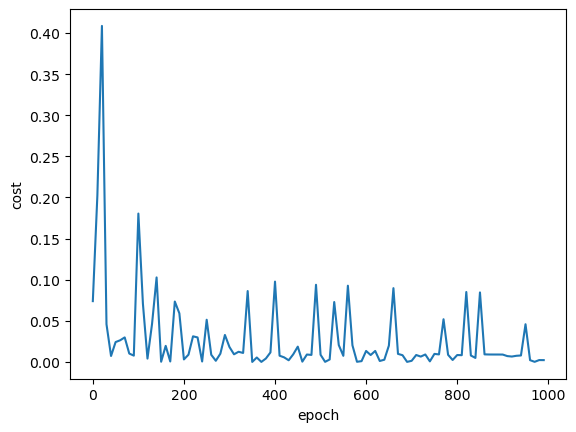

In [64]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [74]:
def predict(x1,x2, w, b):
    scaled_x = sx.transform([[x1, x2]])[0]
    scaled_price = w[0]*scaled_x[0] +w[1]*scaled_x[1]+b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)

C:\Users\mande\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


131.55640395393067